# Image Segmentation with U-Net

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\swaro\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Setting parameters
IMG_HEIGHT = 128  # Height of the images
IMG_WIDTH = 128   # Width of the images
IMG_CHANNELS = 3  # Number of color channels (RGB)

In [3]:
def generate_synthetic_data(num_images):
    X = np.random.rand(num_images, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
    Y = np.random.randint(2, size=(num_images, IMG_HEIGHT, IMG_WIDTH, 1))  # Binary segmentation mask
    return X, Y

In [4]:
# Generating synthetic images and masks
X, Y = generate_synthetic_data(1000) 

In [5]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
# Defining the U-Net model architecture
def unet_model(input_size=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)):
    inputs = Input(input_size)
    # Encoding path (downsampling)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoding path (upsampling)
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [7]:
# Compiling the U-Net model
model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [8]:

# Training the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=16)

Epoch 1/10
50/50 [==============================] - 719s 14s/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4997
Epoch 2/10
50/50 [==============================] - 559s 11s/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5001
Epoch 3/10
50/50 [==============================] - 572s 11s/step - loss: 0.6931 - accuracy: 0.5003 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 524s 10s/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5003
Epoch 5/10
50/50 [==============================] - 487s 10s/step - loss: 0.6931 - accuracy: 0.5006 - val_loss: 0.6931 - val_accuracy: 0.5005
Epoch 6/10
50/50 [==============================] - 483s 10s/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.4996
Epoch 7/10
50/50 [==============================] - 488s 10s/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5001
Epoch 

In [9]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 [==============================] - 17s 2s/step - loss: 0.6932 - accuracy: 0.5001
Test Accuracy: 50.01%


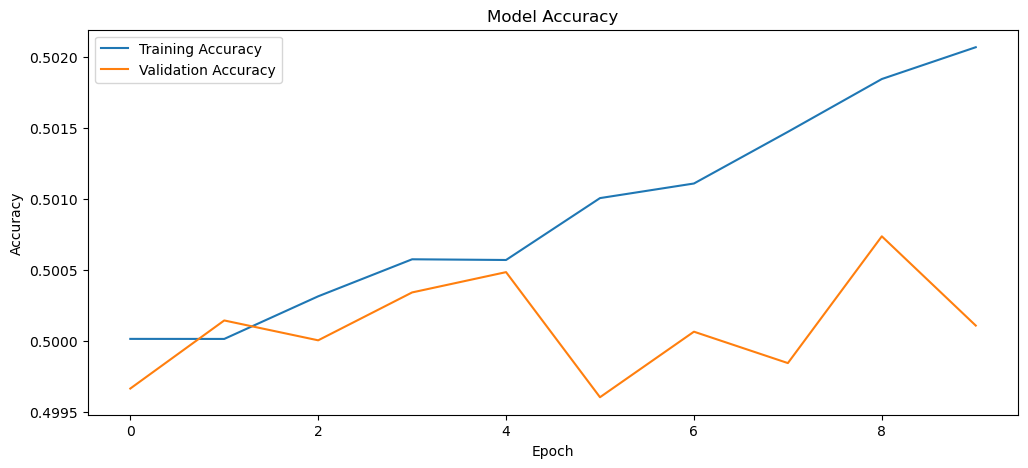

In [10]:
# Visualizing training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 132ms/step


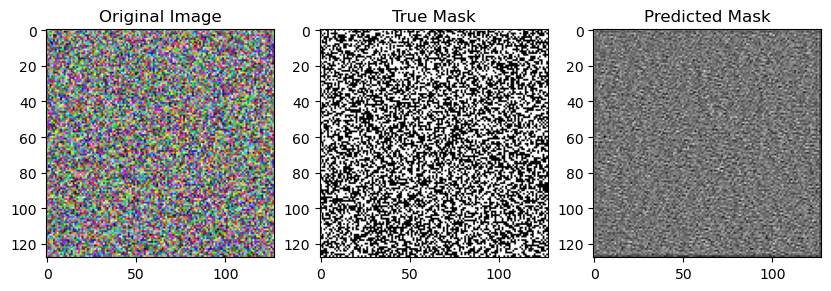

In [12]:
# Visualizing predictions
sample_image = X_test[0]
sample_mask = Y_test[0]
predicted_mask = model.predict(sample_image[np.newaxis, ...])[0]

plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(sample_image)
plt.subplot(1, 3, 2)
plt.title('True Mask')
plt.imshow(sample_mask.squeeze(), cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(predicted_mask.squeeze(), cmap='gray')
plt.show()


In [13]:
sample_image = X_test[0]  # The first image from the test set
sample_mask = Y_test[0]   # The corresponding ground truth mask

In [14]:

# Predict the segmentation mask for the sample image
predicted_mask = model.predict(sample_image[np.newaxis, ...])[0]

1/1 [==============================] - 0s 131ms/step


In [15]:
# Visualize the results
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

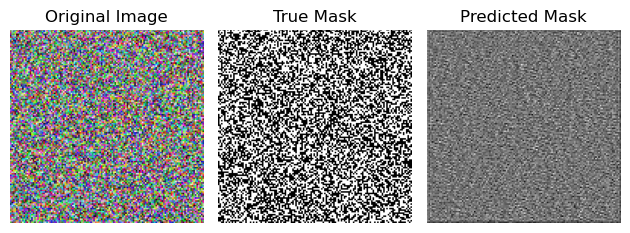

In [17]:
# Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(sample_image)
plt.axis('off')

# True Mask
plt.subplot(1, 3, 2)
plt.title('True Mask')
plt.imshow(sample_mask.squeeze(), cmap='gray')
plt.axis('off')

# Predicted Mask
plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(predicted_mask.squeeze(), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()